<a href="https://colab.research.google.com/github/arushisingh90/SuperResolution-SwinIR-Test/blob/main/SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

!rm -r SwinIR
# Clone SwinIR
!git clone https://github.com/JingyunLiang/SwinIR.git
!pip install timm

# Download the pre-trained models
!wget https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth -P experiments/pretrained_models

     |████████████████████████████████| 161 kB 5.1 MB/s 
     |████████████████████████████████| 5.8 MB 47.3 MB/s 
     |████████████████████████████████| 190 kB 59.4 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194483 sha256=effd5b361515ba6e7f5ac61483911fd4efbee18ac10a0c5339d0a0bcd6817562
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
     |████████████████████████████████| 59 kB 3.2 MB/s 
     |████████████████████████████████| 177 kB 10.3 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=e34ac77e37c998f4b7ef3a0d3ea545ed71954775f15646bca0808ba97cfd34a3
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy
     |████████████████████████████████| 47 kB 2.4 MB/s 
     |████████████████████████████████| 15.3 MB 8.7 MB/s 
  Attempting uninstall

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
python3: can't open file 'setup.py': [Errno 2] No such file or directory
rm: cannot remove 'SwinIR': No such file or directory
Cloning into 'SwinIR'...
remote: Enumerating objects: 317, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 317 (delta 1), reused 1 (delta 0), pack-reused 310
Receiving objects: 100% (317/317), 29.83 MiB | 41.85 MiB/s, done.
Resolving deltas: 100% (108/108), done.
     |████████████████████████████████| 431 kB 5.2 MB/s 
--2022-05-02 03:13:18--  https://github.com/JingyunLiang/SwinIR/releases/download/v0.0/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/

In [ ]:

import os
import glob
from google.colab import files
import shutil
import torch
torch.cuda.empty_cache()
print(' Select folder you want to upload')
# test SwinIR by partioning the image into patches
test_patch_wise = False

upload_folder = 'SwinIR/testsets/RealSRSet'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

 Select folder you want to upload


Saving img6.jpeg to img6.jpeg
Saving img1.jpeg to img1.jpeg
Saving img2.jpeg to img2.jpeg
Saving img3.jpeg to img3.jpeg
Saving img4.jpeg to img4.jpeg
move img6.jpeg to SwinIR/testsets/RealSRSet/img6.jpeg
move img1.jpeg to SwinIR/testsets/RealSRSet/img1.jpeg
move img2.jpeg to SwinIR/testsets/RealSRSet/img2.jpeg
move img3.jpeg to SwinIR/testsets/RealSRSet/img3.jpeg
move img4.jpeg to SwinIR/testsets/RealSRSet/img4.jpeg


In [ ]:
!rm -r results
# SwinIR
if test_patch_wise:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq SwinIR/testsets/RealSRSet --scale 4 --tile 800
else:
  !python SwinIR/main_test_swinir.py --task real_sr --model_path experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth --folder_lq SwinIR/testsets/RealSRSet --scale 4
shutil.move('results/swinir_real_sr_x4', 'results/SwinIR')


loading model from experiments/pretrained_models/003_realSR_BSRGAN_DFO_s64w8_SwinIR-M_x4_GAN.pth
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Testing 0 img1                
Testing 1 img2                
Testing 2 img3                
Testing 3 img4                
Traceback (most recent call last):
  File "SwinIR/main_test_swinir.py", line 287, in <module>
    main()
  File "SwinIR/main_test_swinir.py", line 73, in main
    output = test(img_lq, model, args, window_size)
  File "SwinIR/main_test_swinir.py", line 259, in test
    output = model(img_lq)
  File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/content/SwinIR/models/

'results/SwinIR'

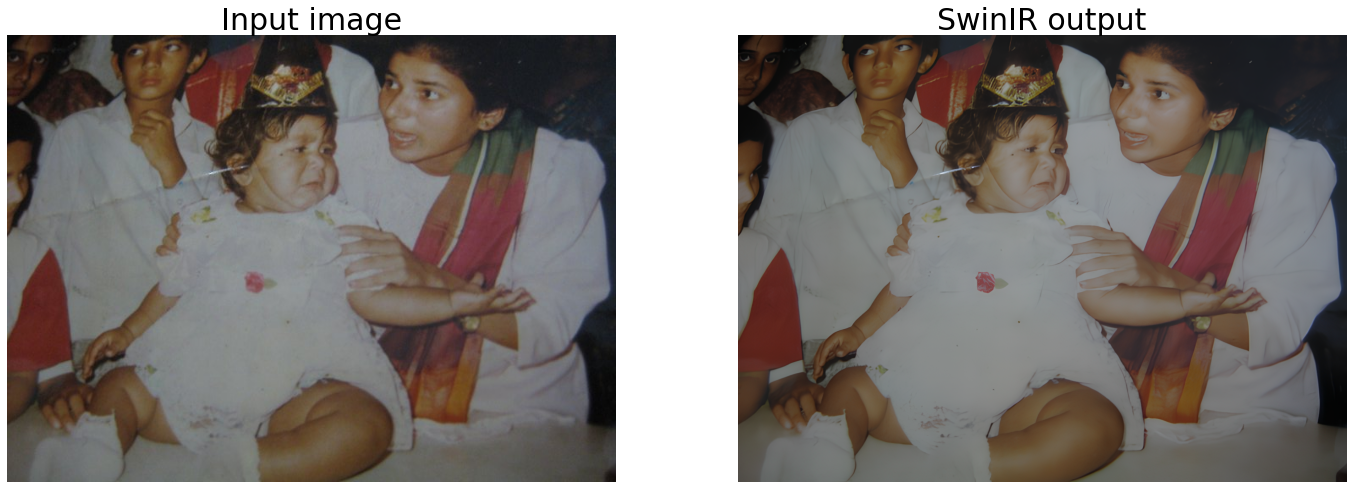

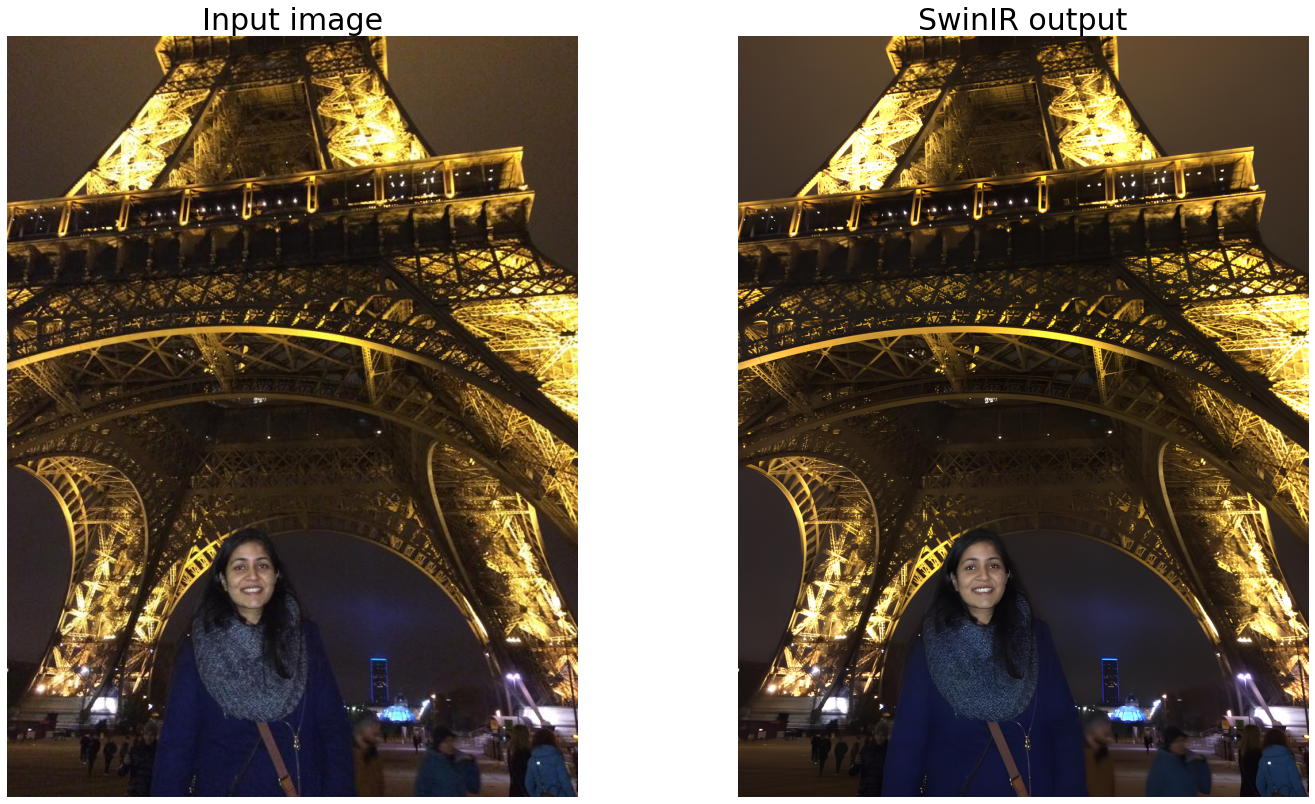

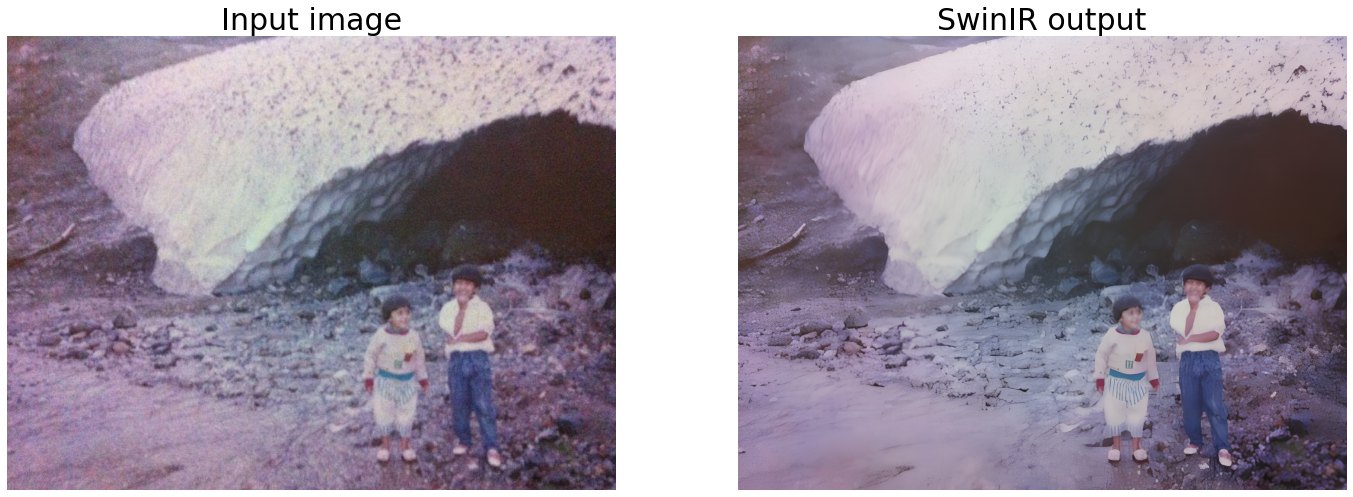

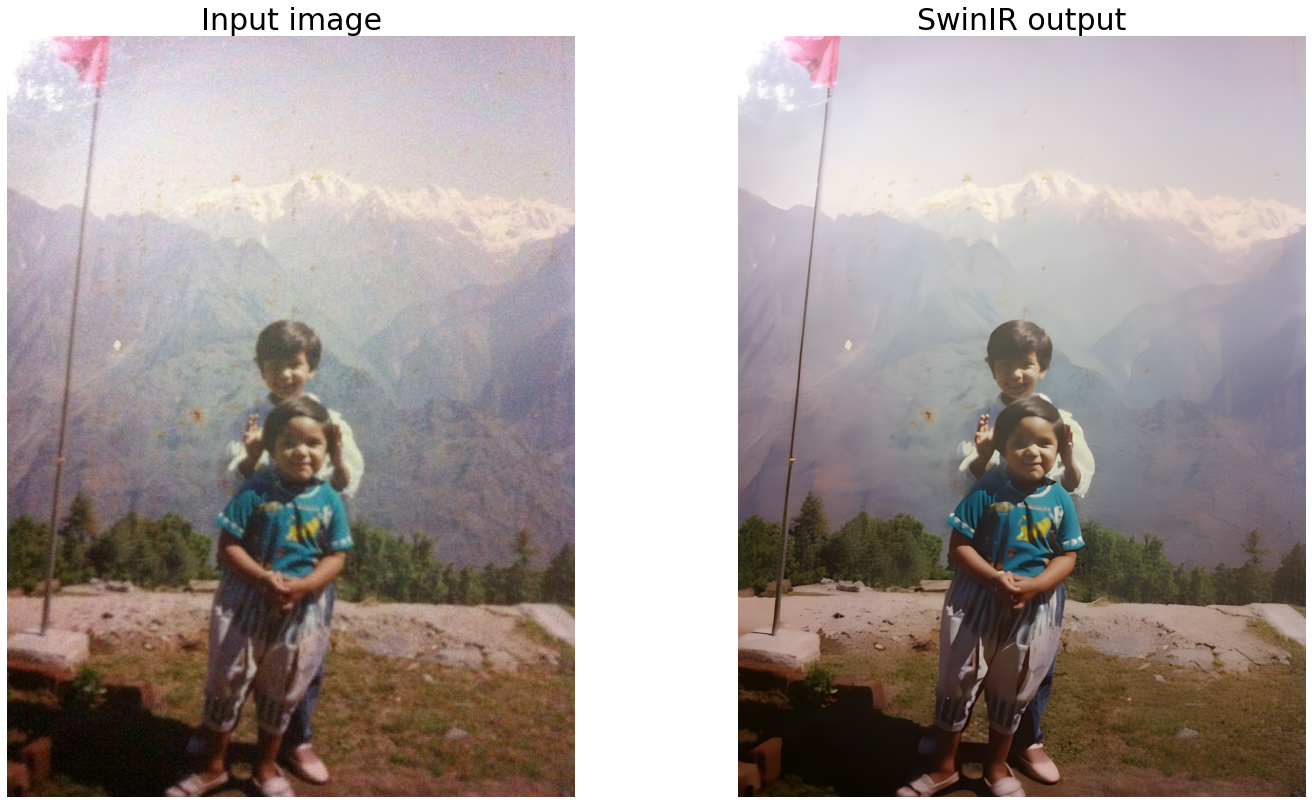

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  total_figs = 2
  fig = plt.figure(figsize=(total_figs*12, 14))
  ax1 = fig.add_subplot(1, total_figs, 1) 
  plt.title('Input image', fontsize=30)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, total_figs, 2)
  plt.title('SwinIR output', fontsize=30)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2['SwinIR'])

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
input_folder = upload_folder
result_folder = 'results/SwinIR'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = {}
  img_output['SwinIR'] = imread(output_path)

  display(img_input, img_output)